In [55]:
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
import math as m
import pandas as pd
import scipy.stats as stat
import scipy.optimize as opt
import seaborn as sb
from scipy.integrate import quad
from scipy.integrate import dblquad
from scipy.special import comb
from sklearn.linear_model import LinearRegression
#plt.style.use('ggplot')

my_norm = lambda exp, disp: stat.norm(loc = exp, scale = m.sqrt(disp))

In [56]:
a = 3; b = 3;

##### Сначала "портим" один раз

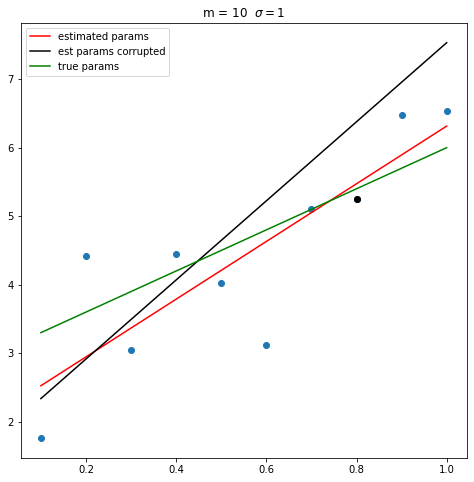

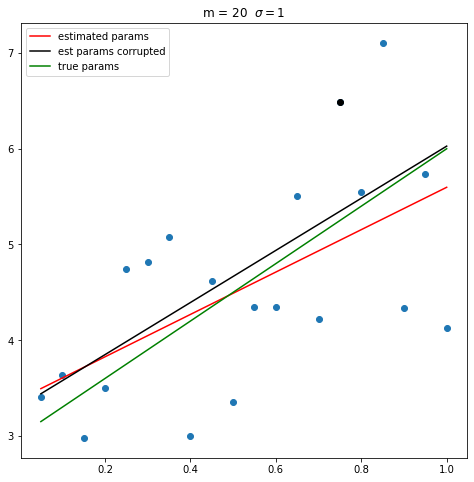

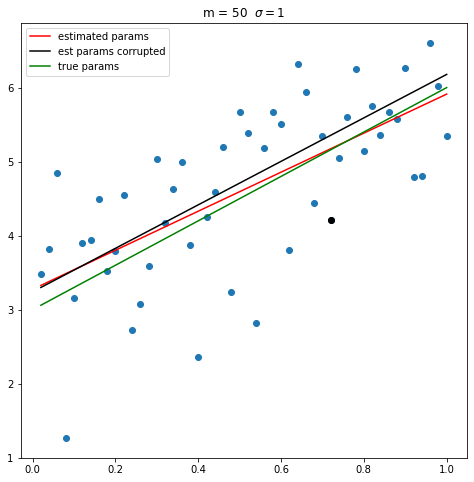

In [72]:
a = 3; b = 3;

t_prec = stat.randint(0, 10).rvs()
for m0 in [10, 20, 50]:
    xs = np.arange(1 / m0, 1 + 1 / m0, step = 1 / m0)
    ys = np.array([a * elem + b + my_norm(0, 1).rvs() for elem in xs])
    ys_corrupt = ys.copy()
    
    t = t_prec * m0 // 10 
    ys_corrupt[t] = a * xs[t] + b + 5
    
    X = np.array([ [elem, 1] for elem in xs])
    result = LinearRegression().fit(X, ys)
    a_pred = result.coef_[0]
    b_pred = result.intercept_
    plt.figure(figsize = (8, 8))
    plt.plot(xs, [a_pred * elem + b_pred for elem in xs] , label = 'estimated params', color = 'red')
    
    result_c = LinearRegression().fit(X, ys_corrupt)
    a_pred = result_c.coef_[0]
    b_pred = result_c.intercept_
    
    plt.scatter(xs, ys)
    plt.scatter(xs[t], ys[t], color = 'black')

    plt.plot(xs, [a_pred * elem + b_pred for elem in xs] , label = 'est params corrupted', color = 'black')
    plt.plot(xs, [a * elem + b for elem in xs] , label = 'true params', color = 'green')
        
    plt.legend()
    plt.title('m = ' + str(m0) + '  $\\sigma = 1$')
    plt.show()

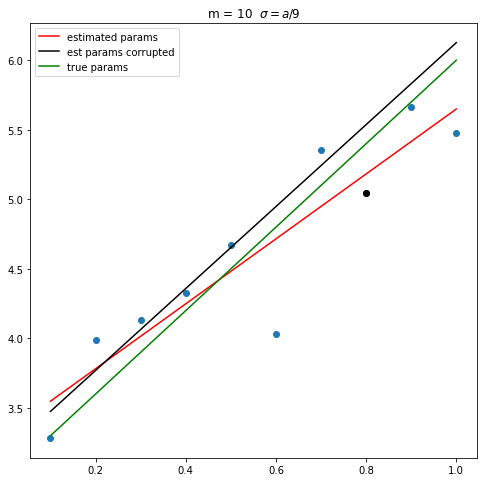

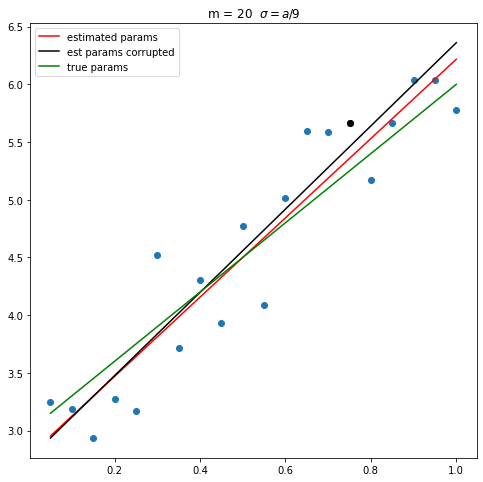

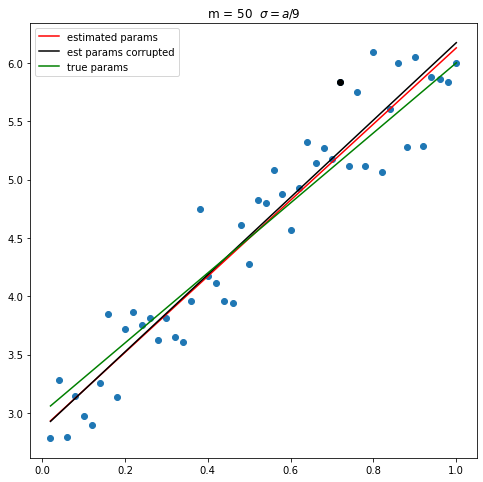

In [79]:
a = 3; b = 3;

t_prec = stat.randint(0, 10).rvs()
for m0 in [10, 20, 50]:
    xs = np.arange(1 / m0, 1 + 1 / m0, step = 1 / m0)
    ys = np.array([a * elem + b + stat.norm(0, a / 9).rvs() for elem in xs])
    ys_corrupt = ys.copy()
    
    t = t_prec * m0 // 10 
    ys_corrupt[t] = a * xs[t] + b + 5 * a / 9
    
    X = np.array([ [elem, 1] for elem in xs])
    result = LinearRegression().fit(X, ys)
    a_pred = result.coef_[0]
    b_pred = result.intercept_
    plt.figure(figsize = (8, 8))
    plt.plot(xs, [a_pred * elem + b_pred for elem in xs] , label = 'estimated params', color = 'red')
    
    result_c = LinearRegression().fit(X, ys_corrupt)
    a_pred = result_c.coef_[0]
    b_pred = result_c.intercept_
    
    plt.scatter(xs, ys)
    plt.scatter(xs[t], ys[t], color = 'black')

    plt.plot(xs, [a_pred * elem + b_pred for elem in xs] , label = 'est params corrupted', color = 'black')
    plt.plot(xs, [a * elem + b for elem in xs] , label = 'true params', color = 'green')
        
    plt.legend()
    plt.title('m = ' + str(m0) + '  $\\sigma = a/9$')
    plt.show()

###### Теперь "портим" в разные стороны

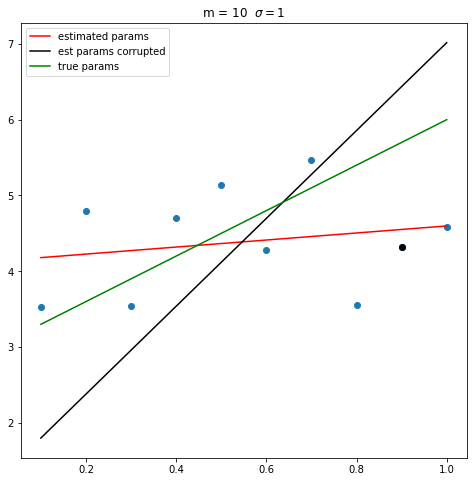

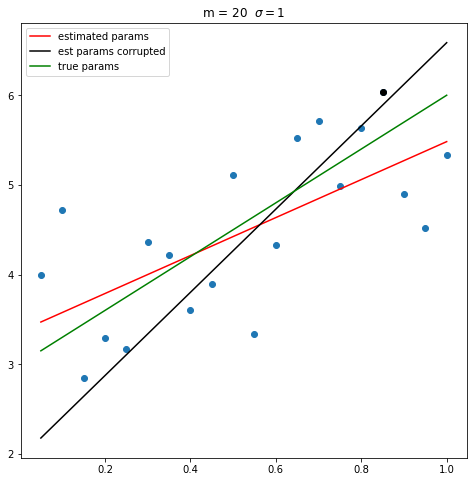

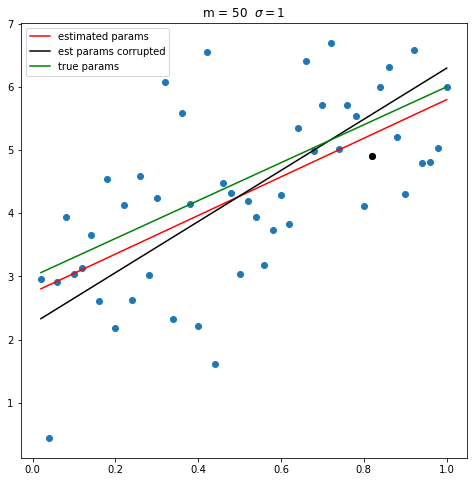

In [76]:
a = 3; b = 3;

t_prec = stat.randint(0, 10).rvs()
for m0 in [10, 20, 50]:
    xs = np.arange(1 / m0, 1 + 1 / m0, step = 1 / m0)
    ys = np.array([a * elem + b + my_norm(0, 1).rvs() for elem in xs])
    ys_corrupt = ys.copy()
    
    t = t_prec * m0 // 10 
    ys_corrupt[t] = a * xs[t] + b + 5
    ys_corrupt[(t + 5) // m0] = a * xs[(t + 5) // m0] + b - 5
    
    X = np.array([ [elem, 1] for elem in xs])
    result = LinearRegression().fit(X, ys)
    a_pred = result.coef_[0]
    b_pred = result.intercept_
    plt.figure(figsize = (8, 8))
    plt.plot(xs, [a_pred * elem + b_pred for elem in xs] , label = 'estimated params', color = 'red')
    
    result_c = LinearRegression().fit(X, ys_corrupt)
    a_pred = result_c.coef_[0]
    b_pred = result_c.intercept_
    
    plt.scatter(xs, ys)
    plt.scatter(xs[t], ys[t], color = 'black')

    plt.plot(xs, [a_pred * elem + b_pred for elem in xs] , label = 'est params corrupted', color = 'black')
    plt.plot(xs, [a * elem + b for elem in xs] , label = 'true params', color = 'green')
        
    plt.legend()
    plt.title('m = ' + str(m0) + '  $\\sigma = 1$')
    plt.show()

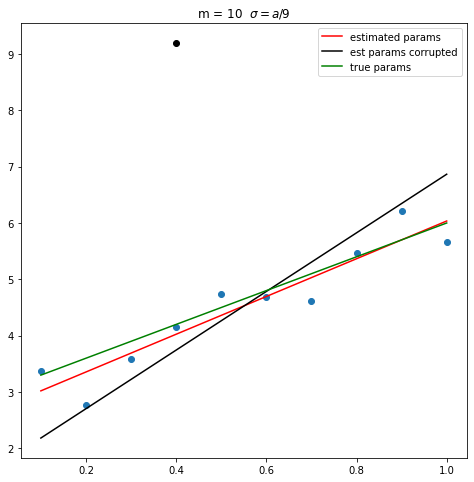

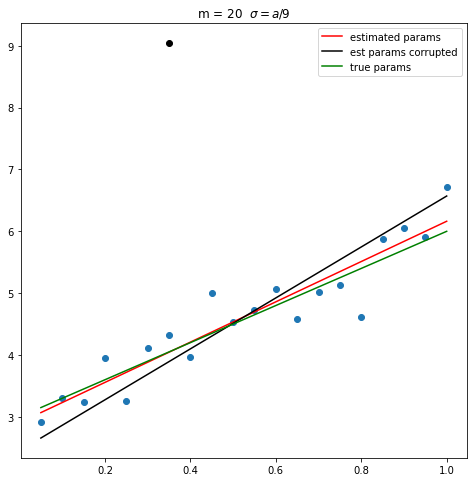

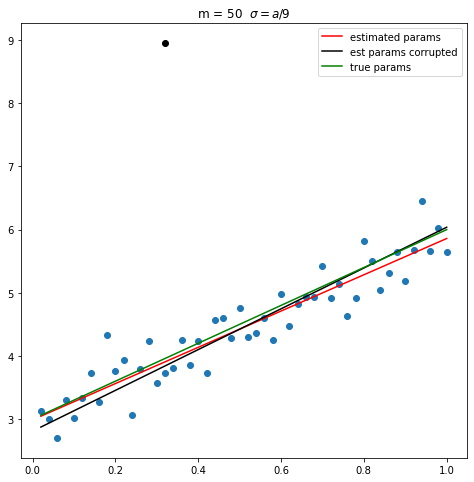

In [80]:
a = 3; b = 3;

t_prec = stat.randint(0, 10).rvs()
for m0 in [10, 20, 50]:
    xs = np.arange(1 / m0, 1 + 1 / m0, step = 1 / m0)
    ys = np.array([a * elem + b + stat.norm(0, a/9).rvs() for elem in xs])
    ys_corrupt = ys.copy()
    
    t = t_prec * m0 // 10 
    ys_corrupt[t] = a * xs[t] + b + 5
    ys_corrupt[(t + 5) // m0] = a * xs[(t + 5) // m0] + b - 5
    
    X = np.array([ [elem, 1] for elem in xs])
    result = LinearRegression().fit(X, ys)
    a_pred = result.coef_[0]
    b_pred = result.intercept_
    plt.figure(figsize = (8, 8))
    plt.plot(xs, [a_pred * elem + b_pred for elem in xs] , label = 'estimated params', color = 'red')
    
    result_c = LinearRegression().fit(X, ys_corrupt)
    a_pred = result_c.coef_[0]
    b_pred = result_c.intercept_
    
    plt.scatter(xs, ys)
    plt.scatter(xs[t], ys_corrupt[t], color = 'black')

    plt.plot(xs, [a_pred * elem + b_pred for elem in xs] , label = 'est params corrupted', color = 'black')
    plt.plot(xs, [a * elem + b for elem in xs] , label = 'true params', color = 'green')
        
    plt.legend()
    plt.title('m = ' + str(m0) + '  $\\sigma = a/9$')
    plt.show()